In [52]:
# Imports
from lr_utils import qr_householder, linear_regression

import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Read the CSV file
housing_data = pd.read_csv('data/real_estate.csv')

# Rename the columns to a simpler format
housing_data.columns = ['No', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']

# Round X1 (transaction date) to int
housing_data['X1'] = housing_data['X1'].round().astype(int)

# Check the updated dataset
print(housing_data.head())

   No    X1    X2         X3  X4        X5         X6     Y
0   1  2013  32.0   84.87882  10  24.98298  121.54024  37.9
1   2  2013  19.5  306.59470   9  24.98034  121.53951  42.2
2   3  2014  13.3  561.98450   5  24.98746  121.54391  47.3
3   4  2014  13.3  561.98450   5  24.98746  121.54391  54.8
4   5  2013   5.0  390.56840   5  24.97937  121.54245  43.1


In [53]:
# Subset the first 350 data points for training
training_data = housing_data.iloc[:350].copy()

X_train = training_data[['X2', 'X3', 'X4', 'X5', 'X6']].values
y_train = training_data['Y'].values

test_data = housing_data.iloc[350:].copy()

X_test = test_data[['X2', 'X3', 'X4', 'X5', 'X6']].values
y_test = test_data['Y'].values

R-squared: 0.5860355994573396
MSE 66.06479597348724
MAE: 6.125477980423974


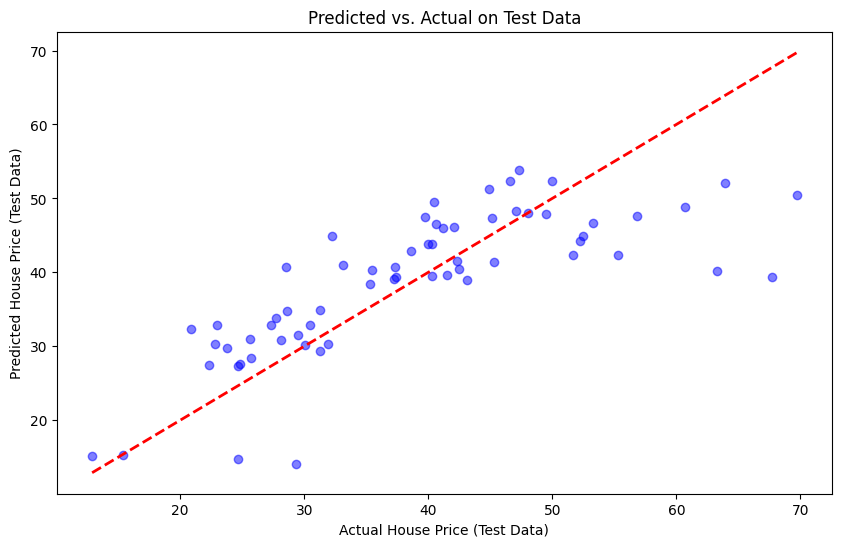

In [54]:
# LINEAR REGRESSION APPROACH

# Method 1: QR decomposition

# Train the model using QR decomposition
w = linear_regression(X_train, y_train)

# Predict on the test set
X_test_bars = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)  # Add bias term
y_pred = np.dot(X_test_bars, w)

# Evaluate the model on the test set
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mse = mean_squared_error(y_test, y_pred)
print("MSE", mse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Plot the test results (Predicted vs. Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual House Price (Test Data)')
plt.ylabel('Predicted House Price (Test Data)')
plt.title('Predicted vs. Actual on Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Reference line
plt.show()

R-squared: 0.5860355994573472
MSE 66.06479597348604
MAE: 6.1254779804221835


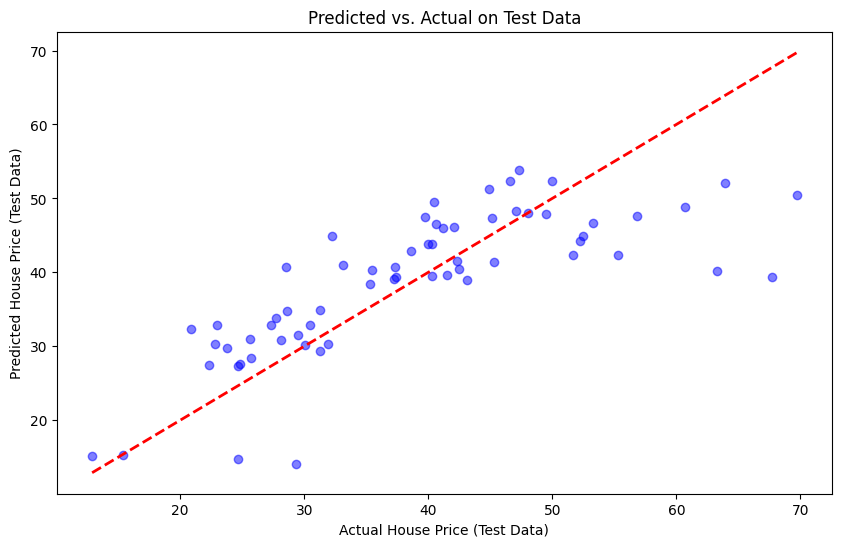

In [55]:
# Method 2: sklearn linear regression

# Train the model
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = regr.predict(X_test)

# Evaluate the model on the test set
r2_lr = r2_score(y_test, y_pred_lr)
print("R-squared:", r2_lr)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print("MSE", mse_lr)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("MAE:", mae_lr)

# Plot the test results (Predicted vs. Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.xlabel('Actual House Price (Test Data)')
plt.ylabel('Predicted House Price (Test Data)')
plt.title('Predicted vs. Actual on Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Reference line
plt.show()

R-squared (KNN): 0.722639484580043
MSE (KNN): 44.264110243055555
MAE (KNN): 4.810503472222222


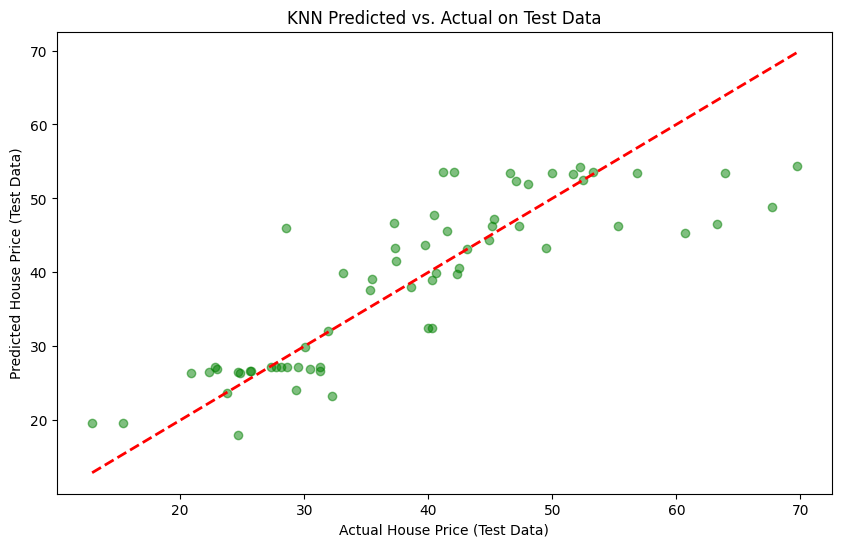

In [56]:
# K-NEAREST NEIGHBORS APPROACH

# Method: sklearn KNN regression

# Train the KNN model
knn_regr = KNeighborsRegressor(n_neighbors=18)
knn_regr.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_regr.predict(X_test)

# Evaluate the KNN model on the test set
r2_knn = r2_score(y_test, y_pred_knn)
print("R-squared (KNN):", r2_knn)

mse_knn = mean_squared_error(y_test, y_pred_knn)
print("MSE (KNN):", mse_knn)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
print("MAE (KNN):", mae_knn)

# Plot the test results (Predicted vs. Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='green', alpha=0.5)
plt.xlabel('Actual House Price (Test Data)')
plt.ylabel('Predicted House Price (Test Data)')
plt.title('KNN Predicted vs. Actual on Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Reference line
plt.show()

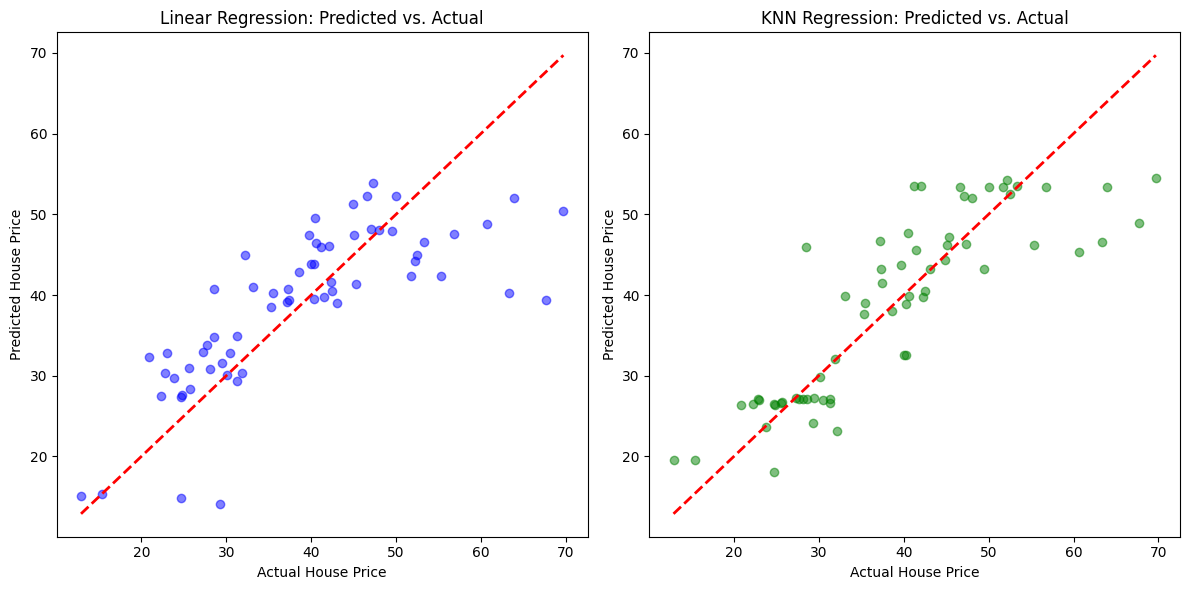

In [57]:
# Plot to compare the predictions visually
plt.figure(figsize=(12, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Reference line
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Linear Regression: Predicted vs. Actual')

# KNN plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Reference line
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('KNN Regression: Predicted vs. Actual')

plt.tight_layout()
plt.show()

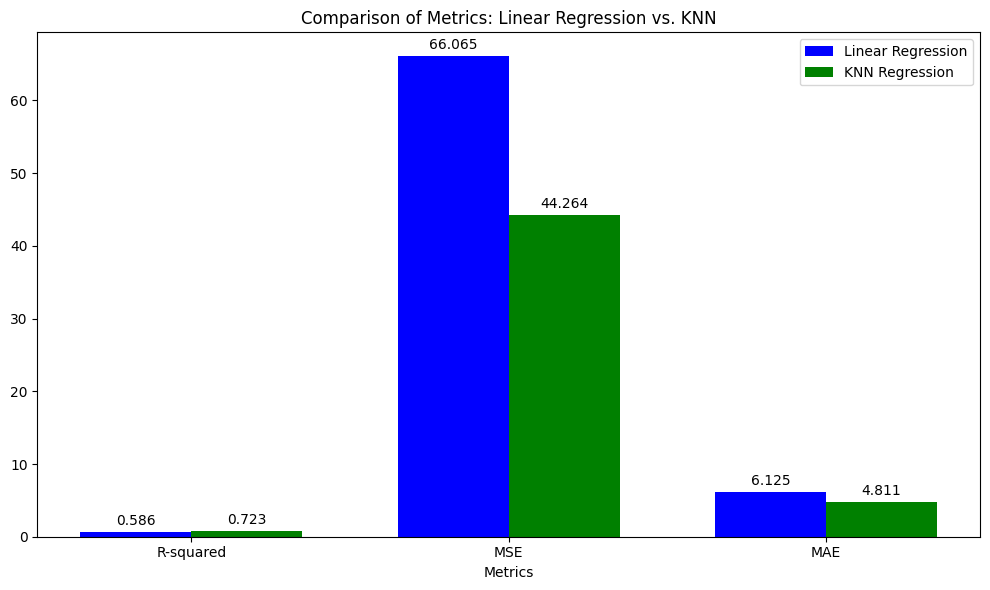

In [58]:
# Metrics for Linear Regression
metrics_lr = [r2_lr, mse_lr, mae_lr]

# Metrics for KNN
metrics_knn = [r2_knn, mse_knn, mae_knn]

# Labels for the metrics
metrics_labels = ['R-squared', 'MSE', 'MAE']

# Create the bar plot
x = np.arange(len(metrics_labels))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for Linear Regression and KNN
bars1 = ax.bar(x - width/2, metrics_lr, width, label='Linear Regression', color='blue')
bars2 = ax.bar(x + width/2, metrics_knn, width, label='KNN Regression', color='green')

# Add labels, title, and a legend
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Metrics: Linear Regression vs. KNN')
ax.set_xticks(x)
ax.set_xticklabels(metrics_labels)
ax.legend()

# Add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',  # Format the text
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()